In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [26]:
data=pd.read_csv(r"C:/Users/jgowr/Documents/Python/dataprjct.csv")
data

,precipitation,temp_max,temp_min,wind
0,2.3,31.7,24.9,13.9
1,15.1,39.4,20.2,NaN
2,6.6,NaN,25.0,10.1
3,NaN,27.1,26.1,7.7
4,0.8,25.5,24.5,11.4
...,...,...,...,...
995,29.8,35.8,13.2,12.6
996,2.9,25.8,19.8,12.8
997,23.2,NaN,20.1,7.9
998,5.5,24.9,NaN,12.9


In [27]:
empty = data.isnull()
print(empty)

     precipitation  temp_max  temp_min   wind
0            False     False     False  False
1            False     False     False   True
2            False      True     False  False
3             True     False     False  False
4            False     False     False  False
..             ...       ...       ...    ...
995          False     False     False  False
996          False     False     False  False
997          False      True     False  False
998          False     False      True  False
999           True     False     False  False

[1000 rows x 4 columns]


In [28]:
empty_cells = data.isnull().sum()
print(empty_cells)

precipitation    4
temp_max         4
temp_min         3
wind             3
dtype: int64


In [29]:
data = data.fillna(data.mean())
data

,precipitation,temp_max,temp_min,wind
0,2.300000,31.700000,24.900000,13.900000
1,15.100000,39.400000,20.200000,10.037613
2,6.600000,30.139859,25.000000,10.100000
3,5.175602,27.100000,26.100000,7.700000
4,0.800000,25.500000,24.500000,11.400000
...,...,...,...,...
995,29.800000,35.800000,13.200000,12.600000
996,2.900000,25.800000,19.800000,12.800000
997,23.200000,30.139859,20.100000,7.900000
998,5.500000,24.900000,21.707623,12.900000


In [30]:
def label_temp(temp):
    if temp <= 20:
        return "Cold"
    elif temp <= 30:
        return "Moderate"
    else:
        return "Hot"

data["temp_label"] = data["temp_max"].apply(label_temp)

print("\nClass Distribution:")
print(data["temp_label"].value_counts())


Class Distribution:
temp_label
Hot         501
Moderate    478
Cold         21
Name: count, dtype: int64


In [31]:
X = data.drop(["temp_max", "temp_label"], axis=1)
y = data["temp_label"]

# Scale features (important for Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [34]:
# Logistic Regression Classifier
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("\n Logistic Regression Results ")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


=== Logistic Regression Results ===
Accuracy: 0.5
Confusion Matrix:
 [[ 0  0  4]
 [ 0 57 43]
 [ 0 53 43]]
Classification Report:
               precision    recall  f1-score   support

        Cold       0.00      0.00      0.00         4
         Hot       0.52      0.57      0.54       100
    Moderate       0.48      0.45      0.46        96

    accuracy                           0.50       200
   macro avg       0.33      0.34      0.34       200
weighted avg       0.49      0.50      0.49       200



C:\Users\jgowr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\jgowr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\jgowr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [35]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("\n=== Random Forest Classification Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


=== Random Forest Classification Results ===
Accuracy: 0.55
Confusion Matrix:
 [[ 0  2  2]
 [ 0 62 38]
 [ 0 48 48]]
Classification Report:
               precision    recall  f1-score   support

        Cold       0.00      0.00      0.00         4
         Hot       0.55      0.62      0.58       100
    Moderate       0.55      0.50      0.52        96

    accuracy                           0.55       200
   macro avg       0.37      0.37      0.37       200
weighted avg       0.54      0.55      0.54       200



C:\Users\jgowr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\jgowr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\jgowr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


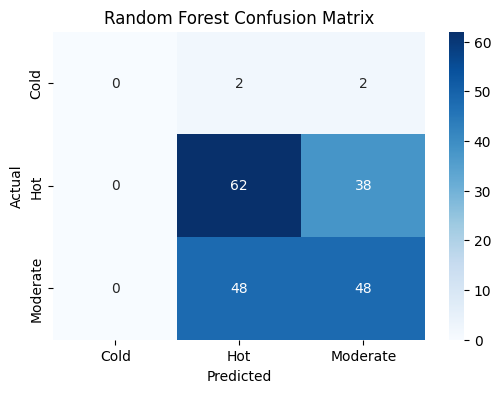

In [36]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues",
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()